In [110]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [84]:
lat_lngs2 = [lats, lngs]
print(pd.DataFrame(lat_lngs2))


        0          1           2           3           4          5     \
0 -89.872923  -2.296839  -78.632024  -89.455194  -52.019723  40.939395   
1  14.087292  95.223344 -152.795895  126.717177  165.019586  -1.369201   

         6          7          8           9     ...        1490        1491  \
0   27.937663  44.048795   24.57666  -42.420426  ...  -39.007721  -28.158071   
1  178.931859  75.046139  103.59863  100.879189  ... -129.001913 -122.826663   

         1492        1493       1494       1495       1496        1497  \
0  -44.627273   33.581622   1.007663  35.013965  44.497562    5.195708   
1  132.725733 -130.566482 -62.621628 -24.981751 -97.535113 -153.271380   

         1498       1499  
0   12.971030  51.193751  
1 -150.009641 -84.034611  

[2 rows x 1500 columns]


In [85]:
longitudes = np.random.uniform(-180.000, 180.000, size=1500)
latitudes = np.random.uniform(-90.000, 90.000, size=1500)
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [86]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [87]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

73.4331496916098 157.5293609458313
-87.49423421159882 -80.31151332811677
-24.28136547399201 -96.06574692473359
77.7979941406287 -37.45818717576188
-71.09814261174242 3.242148465130299
-64.79835416122145 -81.1696333624011
45.15952492975228 -135.17942679640143
23.941514912565694 115.40527226046856
-40.44000123225376 11.43318840585124
-44.92455855721888 -135.28271358960438
-15.887152583535553 -117.97645290335124
30.498097216550804 -126.44218842866448
14.858996260887665 136.33613815864078
-65.50835914828777 130.94184549866492
76.67530233530061 -82.52223958088666
37.38268457145129 -34.46989393254739
19.58733953901053 15.007990467396041
25.67733085612599 -46.20605238948289
39.48398261446559 -124.45375507509169
87.79386014888252 -98.03841056898275
-25.69535753013585 155.79450659061195
-17.70238198768621 16.138007177371037
39.98274598146216 35.57477276089077
12.534845392767323 44.39111745768463
-89.4906840739459 118.69899143048468
57.61165973492842 -131.45043521215985
-77.77141410652818 73.838

In [88]:
import citipy as citipy

from citipy import citipy
city = citipy.nearest_city(22.99, 120.21).city_name
country = citipy.nearest_city(22.99, 120.21).country_code
print(city + " " + country)


tainan tw


In [89]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [90]:
import requests
from config import weather_api_key

In [91]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [92]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [93]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [96]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | yuancheng
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bilma
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | coolum beach
Processing Record 21 of Set 1 | ondangwa
Processing Record 22 of Set 1 | sorgun
Processing Record 23 of Set 1 | aden
Processing Record 24 of Set 1 | albany
Processing Record 25 o

In [97]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,49.6835,-83.6665,75.45,87,95,10.71,CA,2022-08-29 20:38:15
1,Cherskiy,68.7500,161.3000,46.38,67,13,11.52,RU,2022-08-29 20:48:59
2,Ushuaia,-54.8000,-68.3000,49.66,62,20,8.05,AR,2022-08-29 20:45:31
3,Pisco,-13.7000,-76.2167,62.65,77,40,9.22,PE,2022-08-29 20:46:18
4,Tasiilaq,65.6145,-37.6368,48.36,94,100,25.75,GL,2022-08-29 20:49:37
5,Hermanus,-34.4187,19.2345,45.81,62,5,15.90,ZA,2022-08-29 20:49:37
6,Punta Arenas,-53.1500,-70.9167,48.31,66,75,5.75,CL,2022-08-29 20:49:37
7,Port Hardy,50.6996,-127.4199,68.18,73,75,10.36,CA,2022-08-29 20:45:44
8,Yuancheng,36.6520,107.7896,56.80,70,86,1.10,CN,2022-08-29 20:49:38
9,Cape Town,-33.9258,18.4232,54.12,51,20,25.32,ZA,2022-08-29 20:49:38


In [102]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order] 
new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,CA,2022-08-29 20:38:15,49.6835,-83.6665,75.45,87,95,10.71
1,Cherskiy,RU,2022-08-29 20:48:59,68.7500,161.3000,46.38,67,13,11.52
2,Ushuaia,AR,2022-08-29 20:45:31,-54.8000,-68.3000,49.66,62,20,8.05
3,Pisco,PE,2022-08-29 20:46:18,-13.7000,-76.2167,62.65,77,40,9.22
4,Tasiilaq,GL,2022-08-29 20:49:37,65.6145,-37.6368,48.36,94,100,25.75


In [103]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [106]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

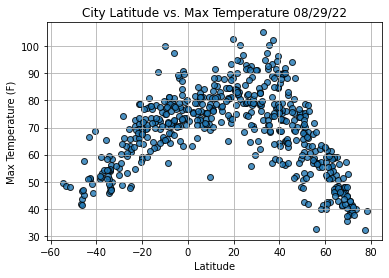

In [112]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

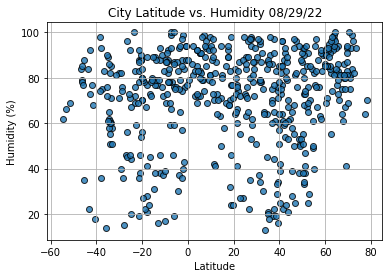

In [113]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

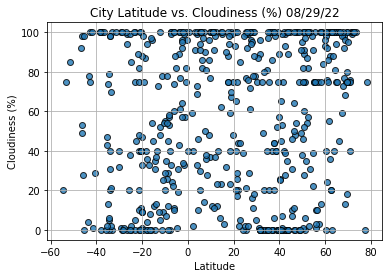

In [114]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

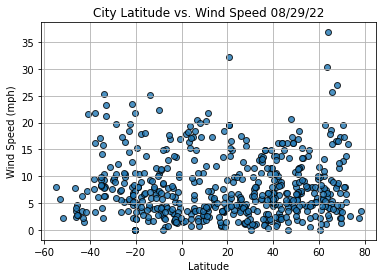

In [115]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()